In [211]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [212]:
f1 = open('ATE_train.json' , 'r' , encoding='utf-8')
f2 = open('ATE_test.json' , 'r' , encoding='utf-8')
f3 = open('ATE_val.json' , 'r' , encoding='utf-8')

train_data = list(json.load(f1).values())
test_data = list(json.load(f2).values())
val_data = list(json.load(f3).values())


f1.close()
f2.close()
f3.close()

In [213]:
texts = []

for i in train_data + test_data + val_data:
    texts.append(i['text'])

texts[0:10]

['I charge it at night and skip taking the cord with me because of the good battery life .',
 'it is of high quality , has a killer GUI , is extremely stable , is highly expandable , is bundled with lots of very good applications , is easy to use , and is absolutely gorgeous .',
 'Easy to start up and does not overheat as much as other laptops .',
 'Great laptop that offers many great features !',
 'One night I turned the freaking thing off after using it , the next day I turn it on , no GUI , screen all dark , power light steady , hard drive light steady and not flashing as it usually does .',
 "However , the multi-touch gestures and large tracking area make having an external mouse unnecessary ( unless you 're gaming ) .",
 'I love the way the entire suite of software works together .',
 'The speed is incredible and I am more than satisfied .',
 'I can barely use any usb devices because they will not stay connected properly .',
 'When I finally had everything running with all my soft

In [214]:
# Tokenizing the text & converting each word of the sentence to an index in the vocabulary

from keras.preprocessing.text import Tokenizer

In [215]:
Tokenizer = Tokenizer(lower=False)
Tokenizer.fit_on_texts(texts)

sequences = Tokenizer.texts_to_sequences(texts)

sequences

[[3, 331, 7, 45, 593, 2, 1636, 713, 1, 594, 12, 39, 68, 8, 1, 59, 35, 57],
 [7,
  5,
  8,
  332,
  80,
  31,
  6,
  1637,
  1136,
  5,
  368,
  1137,
  5,
  595,
  1638,
  5,
  1138,
  12,
  513,
  8,
  22,
  59,
  183,
  5,
  37,
  4,
  24,
  2,
  5,
  415,
  596],
 [597, 4, 457, 43, 2, 73, 18, 1639, 38, 74, 38, 93, 184],
 [248, 27, 11, 514, 130, 25, 89],
 [714,
  593,
  3,
  864,
  1,
  715,
  83,
  202,
  69,
  123,
  7,
  1,
  249,
  290,
  3,
  716,
  7,
  16,
  75,
  1136,
  36,
  42,
  458,
  94,
  203,
  1139,
  70,
  62,
  203,
  1139,
  2,
  18,
  1640,
  38,
  7,
  717,
  73],
 [416,
  1,
  515,
  167,
  865,
  2,
  291,
  1140,
  1641,
  168,
  160,
  55,
  262,
  124,
  1141,
  598,
  19,
  417,
  204],
 [3, 90, 1, 169, 1, 599, 1642, 8, 79, 88, 1142],
 [10, 133, 5, 1643, 2, 3, 95, 61, 56, 718],
 [3, 49, 866, 24, 91, 867, 868, 68, 40, 81, 18, 719, 1143, 600],
 [459,
  3,
  516,
  32,
  144,
  221,
  12,
  42,
  14,
  79,
  369,
  3,
  601,
  15,
  14,
  1644,
  4,
  1645,
 

In [216]:
# extracting all the labels 

labels = []
max_sentence_length = 0

for i in train_data + test_data + val_data:
    for j in i['labels']:
        max_sentence_length = max(max_sentence_length , len(i['text'].split(' ')))
        if j not in labels:
            labels.append(j)

labels.append('UNKNNOWN')
labels.sort()

labels 

['B', 'I', 'O', 'UNKNNOWN']

In [217]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(labels)

label_encoder.classes_

array(['B', 'I', 'O', 'UNKNNOWN'], dtype='<U8')

In [218]:
label_encoder.transform(labels)

array([0, 1, 2, 3])

In [219]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [220]:
def preprocess_data(data, Tokenizer, LabelEncoder):
    global max_sentence_length
    
    texts = []
    for i in data:
        texts.append(i['text'])

    x = Tokenizer.texts_to_sequences(texts)
    x = pad_sequences(x, maxlen=max_sentence_length, padding='post')


    y = [[label if label in LabelEncoder.classes_ else 'UNKNOWN' for label in item['labels']] for item in data]
    y = [LabelEncoder.transform(sublist).tolist() for sublist in y]
    y = pad_sequences(y, maxlen=max_sentence_length, padding='post')
    y = to_categorical(y, num_classes=len(LabelEncoder.classes_))
    
    return x, y

In [221]:
x_train , y_train = preprocess_data(train_data , Tokenizer , label_encoder)
x_val , y_val = preprocess_data(val_data , Tokenizer , label_encoder)
x_test , y_test = preprocess_data(test_data , Tokenizer , label_encoder)

In [222]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((906, 83), (906, 83, 4), (219, 83), (219, 83, 4), (328, 83), (328, 83, 4))

In [223]:
Tokenizer.word_index

{'the': 1,
 'and': 2,
 'I': 3,
 'to': 4,
 'is': 5,
 'a': 6,
 'it': 7,
 'of': 8,
 'for': 9,
 'The': 10,
 'that': 11,
 'with': 12,
 'was': 13,
 'my': 14,
 'in': 15,
 'on': 16,
 'this': 17,
 'not': 18,
 'you': 19,
 'It': 20,
 'have': 21,
 'very': 22,
 'computer': 23,
 'use': 24,
 'great': 25,
 "n't": 26,
 'laptop': 27,
 'but': 28,
 'so': 29,
 'are': 30,
 'has': 31,
 'had': 32,
 "'s": 33,
 'be': 34,
 'battery': 35,
 'screen': 36,
 'easy': 37,
 'as': 38,
 'me': 39,
 'they': 40,
 'just': 41,
 'all': 42,
 'up': 43,
 'like': 44,
 'at': 45,
 'or': 46,
 'would': 47,
 'only': 48,
 'can': 49,
 'about': 50,
 'when': 51,
 'out': 52,
 'which': 53,
 'do': 54,
 'an': 55,
 'than': 56,
 'life': 57,
 'price': 58,
 'good': 59,
 'also': 60,
 'more': 61,
 'drive': 62,
 'well': 63,
 'one': 64,
 'if': 65,
 'fast': 66,
 'keyboard': 67,
 'because': 68,
 'after': 69,
 'hard': 70,
 'from': 71,
 'Mac': 72,
 'does': 73,
 'much': 74,
 'no': 75,
 'Windows': 76,
 'system': 77,
 'new': 78,
 'software': 79,
 'quality': 8

In [224]:
import gensim.downloader as api

w2v_embeddings = {}
fasttext_embeddings = {}
glove_embeddings = {}

f1 = open(r'C:\Users\Utkarsh Venaik\Desktop\sem6\NLP\NLP_A2\Embeddings\fasttext_embeddings.vec' , 'r' , encoding='utf-8')
f2 = open(r'C:\Users\Utkarsh Venaik\Desktop\sem6\NLP\NLP_A2\Embeddings\glove_embeddings.txt' , 'r' , encoding='utf-8')

def load_embedding(str , fd):
    if str == "w2v":
        w2v_embeddings = api.load("word2vec-google-news-300")
        return 
    elif str == "fasttext":
        next(fd)
    for i in fd:
        values = i.rstrip().split(' ')
        try:
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            if str == "fasttext":
                fasttext_embeddings[word] = vector
            else:
                glove_embeddings[word] = vector
        except:
            continue
        

load_embedding("w2v" , None)
load_embedding("fasttext" , f1)
load_embedding("glove" , f2)

f1.close()
f2.close()

w2v_embeddings = api.load("word2vec-google-news-300")

In [225]:
len(w2v_embeddings) , len(fasttext_embeddings) , len(glove_embeddings)

(3000000, 2000000, 2196016)

In [226]:
vocab_size = len(Tokenizer.word_index) + 1
embedding_dimension = 300 # hardcoded for each of the embeddings by the creator 

embedding_matrix_w2v = np.zeros((vocab_size , embedding_dimension))
embedding_matrix_fasttext = np.zeros((vocab_size , embedding_dimension))
embedding_matrix_glove = np.zeros((vocab_size , embedding_dimension))

print(embedding_matrix_w2v.shape , embedding_matrix_fasttext.shape , embedding_matrix_glove.shape)

(3410, 300) (3410, 300) (3410, 300)


In [227]:
for i , j in Tokenizer.word_index.items():
    if i in w2v_embeddings:
        embedding_matrix_w2v[j] = w2v_embeddings[i]
    if i in fasttext_embeddings:
        embedding_matrix_fasttext[j] = fasttext_embeddings[i]
    if i in glove_embeddings:
        embedding_matrix_glove[j] = glove_embeddings[i]

In [238]:
texts[0:5]

['I charge it at night and skip taking the cord with me because of the good battery life .',
 'it is of high quality , has a killer GUI , is extremely stable , is highly expandable , is bundled with lots of very good applications , is easy to use , and is absolutely gorgeous .',
 'Easy to start up and does not overheat as much as other laptops .',
 'Great laptop that offers many great features !',
 'One night I turned the freaking thing off after using it , the next day I turn it on , no GUI , screen all dark , power light steady , hard drive light steady and not flashing as it usually does .']

MODEL IMPLEMENTATION

In [239]:
ctr = 0

def plot_graph(model , embedding_name , model_type , i_graph):
    global ctr 
    ctr+=1
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title(f'{model_type} model accuracy using {embedding_name} embeddings')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])


    plt.subplot(1, 3, 2)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title(f'{model_type} model loss using {embedding_name} embeddings')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])

    if i_graph == 0:
        recall_train = model.history[f'recall']
        precision_train = model.history['precision']
        recall_val = model.history[f'val_recall']
        precision_val = model.history['val_precision']        
    else :
        recall_train = model.history[f'recall_{i_graph}']
        precision_train = model.history[f'precision_{i_graph}']
        recall_val = model.history[f'val_recall_{i_graph}']
        precision_val = model.history[f'val_precision_{i_graph}']

        
    f1_train = []
    for i in range(len(recall_train)):
        f1_train.append((2 * (precision_train[i] * recall_train[i])) / (precision_train[i] + recall_train[i]))
    
    f1_val = []
    for i in range(len(recall_val)):
        f1_val.append((2 * (precision_val[i] * recall_val[i])) / (precision_val[i] + recall_val[i]))

   # print(f1_train , f1_val)

    plt.subplot(1, 3, 3)
    plt.plot(f1_train)
    plt.plot(f1_val)
    plt.title(f'{model_type} model f1 score using {embedding_name} embeddings')
    plt.ylabel('f1 score')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.yticks([])

    plt.show()



In [240]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, TimeDistributed, Bidirectional
from keras.optimizers import Adam
from sklearn.metrics import f1_score

In [241]:
import torch
import torch.nn as nn
import torch.optim as optim
# from torchcrf import CRF

class BiLSTM_CRF(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, num_classes):
        super(BiLSTM_CRF, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), freeze=True)
        self.lstm = nn.LSTM(embedding_matrix.shape[1], hidden_dim // 2,
                            num_layers=1, bidirectional=True, batch_first=True)
        self.hidden2tag = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        emissions = self.hidden2tag(lstm_out)
        return emissions

#1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 83, 300)           1023000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 83, 100)           40100     
                                                                 
 time_distributed (TimeDist  (None, 83, 4)             404       
 ributed)                                                        
                                                                 
Total params: 1063504 (4.06 MB)
Trainable params: 40504 (158.22 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 5s 97ms/step - loss: 0.3696 - accuracy: 0.8913 - precision: 0.9392 - recall: 0.8061 - val_loss: 0.1360 - val_accuracy: 0.9606 - val_precision: 0.9616 - val_reca

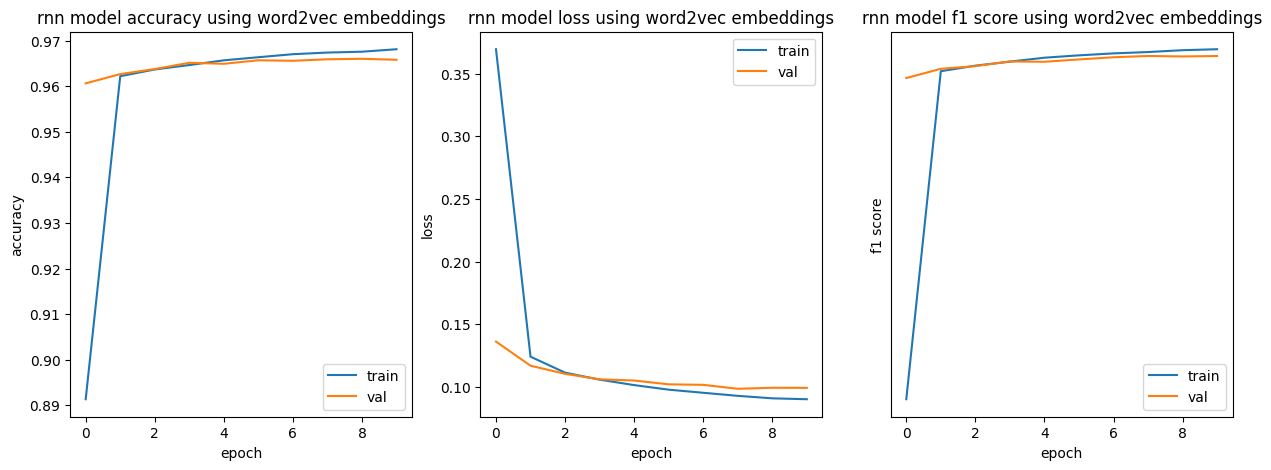

INFO:tensorflow:Assets written to: t2_model1_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t2_model1_word2vec.pkl\assets


#2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 83, 300)           1023000   
                                                                 
 lstm (LSTM)                 (None, 83, 100)           160400    
                                                                 
 time_distributed_1 (TimeDi  (None, 83, 4)             404       
 stributed)                                                      
                                                                 
Total params: 1183804 (4.52 MB)
Trainable params: 160804 (628.14 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 8s 176ms/step - loss: 0.6360 - accuracy: 0.9089 - precision_1: 0.9446 - recall_1: 0.5666 - val_loss: 0.1632 - val_accuracy: 0.9517 - val_precision_1: 0.95

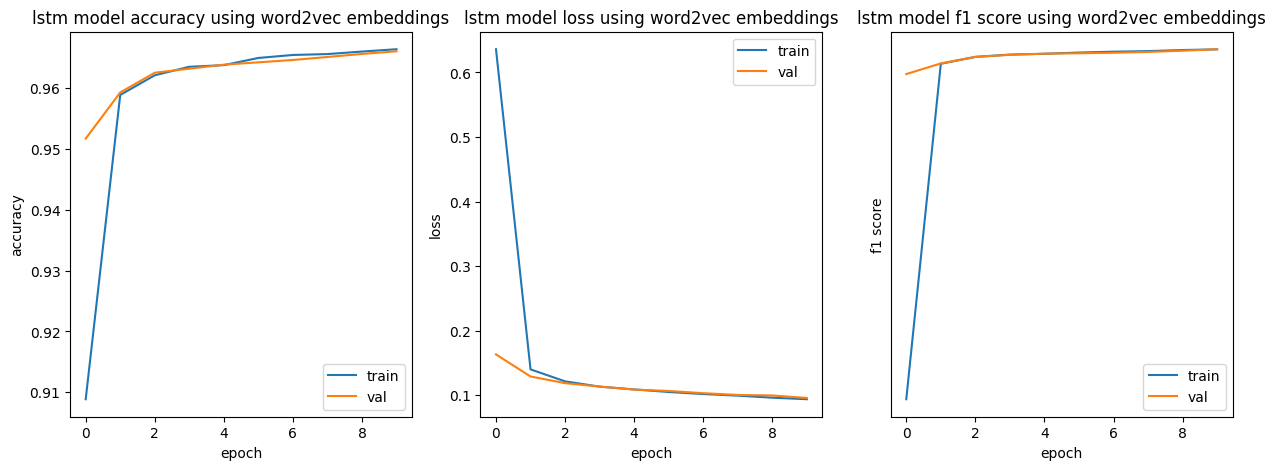

INFO:tensorflow:Assets written to: t2_model2_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t2_model2_word2vec.pkl\assets


#3
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 83, 300)           1023000   
                                                                 
 gru (GRU)                   (None, 83, 100)           120600    
                                                                 
 time_distributed_2 (TimeDi  (None, 83, 4)             404       
 stributed)                                                      
                                                                 
Total params: 1144004 (4.36 MB)
Trainable params: 121004 (472.67 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 7s 151ms/step - loss: 0.7914 - accuracy: 0.9294 - precision_2: 0.9270 - recall_2: 0.4113 - val_loss: 0.1886 - val_accuracy: 0.9506 - val_precision_2: 0.95

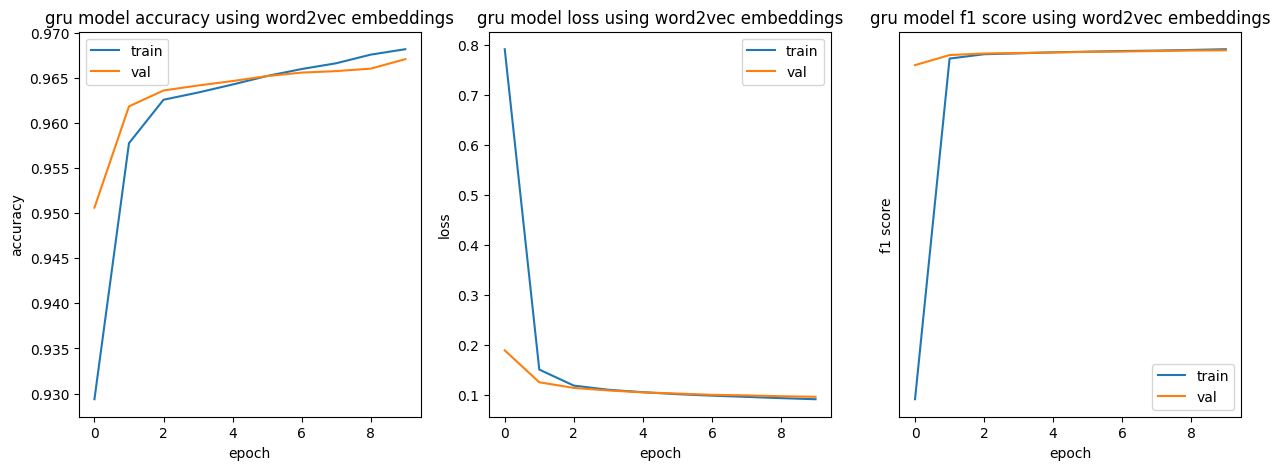

INFO:tensorflow:Assets written to: t2_model3_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t2_model3_word2vec.pkl\assets


#4
Epoch 1/20
29/29 [==============================] - 11s 284ms/step - loss: 0.6192 - accuracy: 0.9162 - precision_3: 0.9416 - recall_3: 0.5743 - val_loss: 0.1418 - val_accuracy: 0.9603 - val_precision_3: 0.9612 - val_recall_3: 0.9593
Epoch 2/20
29/29 [==============================] - 8s 269ms/step - loss: 0.1268 - accuracy: 0.9613 - precision_3: 0.9629 - recall_3: 0.9594 - val_loss: 0.1179 - val_accuracy: 0.9628 - val_precision_3: 0.9650 - val_recall_3: 0.9600
Epoch 3/20
29/29 [==============================] - 8s 274ms/step - loss: 0.1128 - accuracy: 0.9637 - precision_3: 0.9656 - recall_3: 0.9613 - val_loss: 0.1101 - val_accuracy: 0.9632 - val_precision_3: 0.9653 - val_recall_3: 0.9608
Epoch 4/20
29/29 [==============================] - 8s 269ms/step - loss: 0.1060 - accuracy: 0.9645 - precision_3: 0.9667 - recall_3: 0.9624 - val_loss: 0.1048 - val_accuracy: 0.9644 - val_precision_3: 0.9672 - val_recall_3: 0.9615
Epoch 5/20
29/29 [==============================] - 9s 301ms/step - 

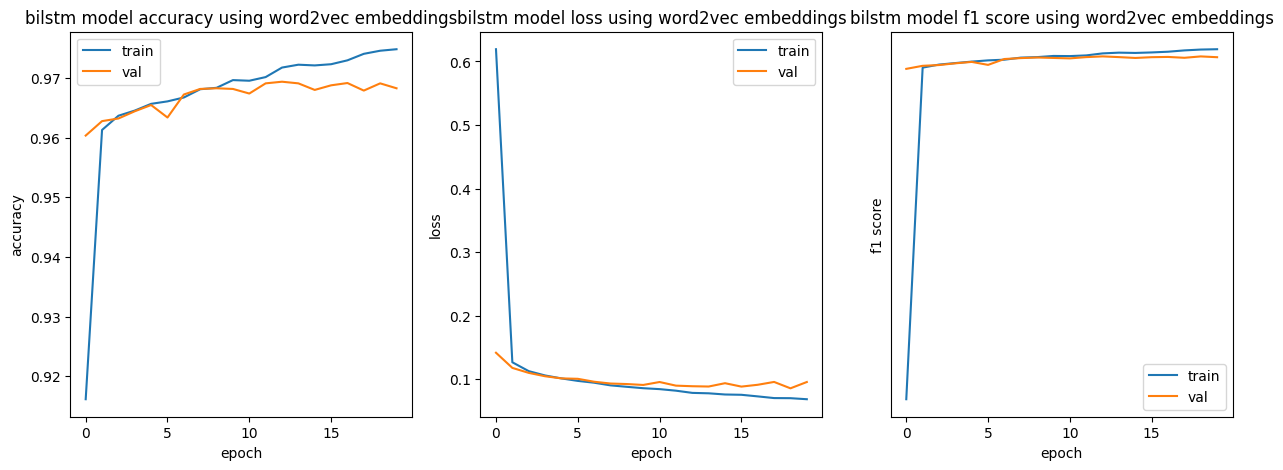

INFO:tensorflow:Assets written to: t2_model4_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t2_model4_word2vec.pkl\assets


#5
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 83, 300)           1023000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 83, 100)           40100     
                                                                 
 time_distributed_4 (TimeDi  (None, 83, 4)             404       
 stributed)                                                      
                                                                 
Total params: 1063504 (4.06 MB)
Trainable params: 40504 (158.22 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 3s 76ms/step - loss: 0.4009 - accuracy: 0.8864 - precision_4: 0.9395 - recall_4: 0.7654 - val_loss: 0.1591 - val_accuracy: 0.9533 - val_precision_4: 0.9553

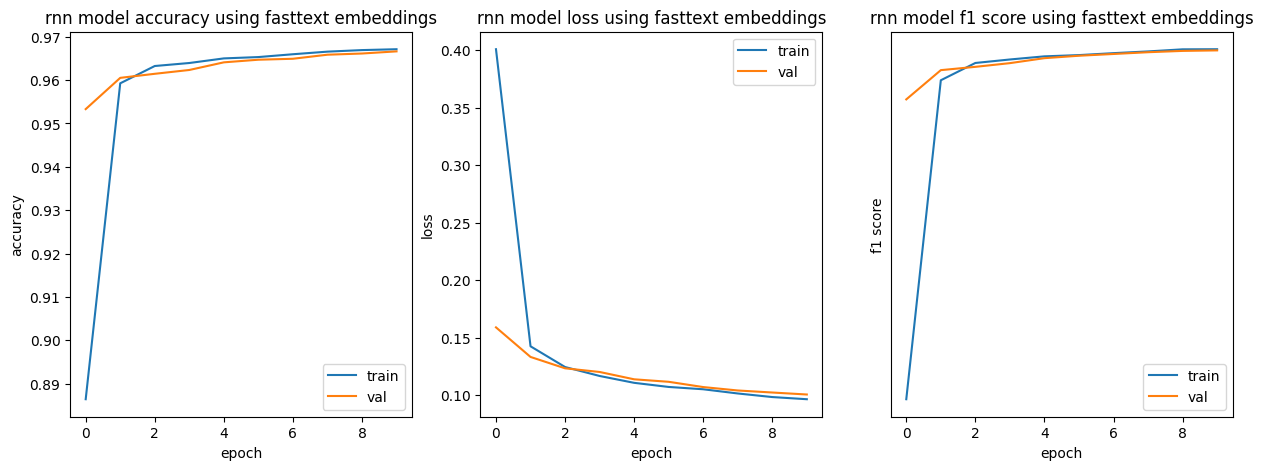

INFO:tensorflow:Assets written to: t2_model1_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t2_model1_fasttext.pkl\assets


#6
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 83, 300)           1023000   
                                                                 
 lstm_2 (LSTM)               (None, 83, 100)           160400    
                                                                 
 time_distributed_5 (TimeDi  (None, 83, 4)             404       
 stributed)                                                      
                                                                 
Total params: 1183804 (4.52 MB)
Trainable params: 160804 (628.14 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 6s 145ms/step - loss: 0.6516 - accuracy: 0.9229 - precision_5: 0.9440 - recall_5: 0.5284 - val_loss: 0.1761 - val_accuracy: 0.9456 - val_precision_5: 0.95

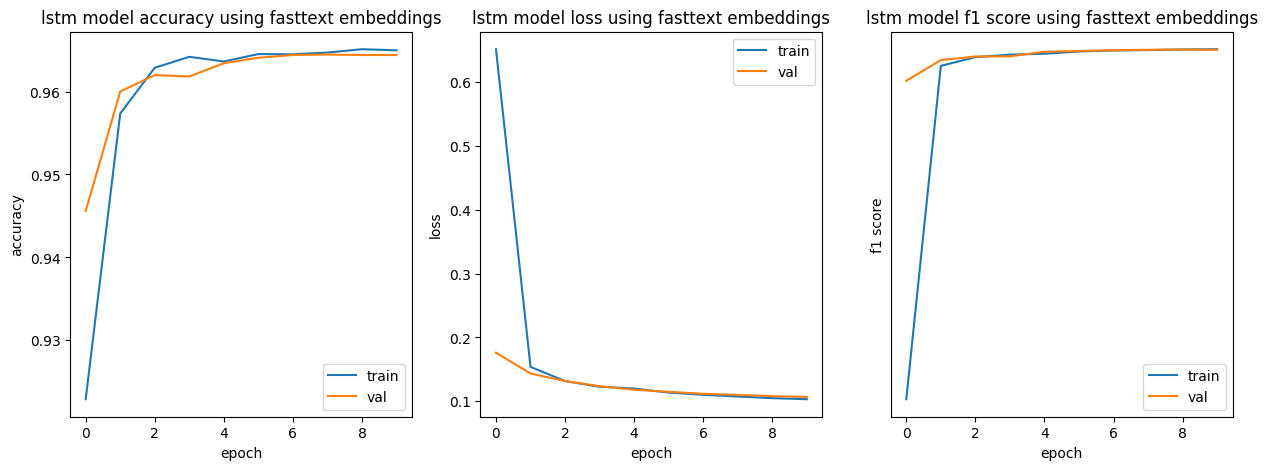

INFO:tensorflow:Assets written to: t2_model2_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t2_model2_fasttext.pkl\assets


#7
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 83, 300)           1023000   
                                                                 
 gru_1 (GRU)                 (None, 83, 100)           120600    
                                                                 
 time_distributed_6 (TimeDi  (None, 83, 4)             404       
 stributed)                                                      
                                                                 
Total params: 1144004 (4.36 MB)
Trainable params: 121004 (472.67 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 7s 159ms/step - loss: 0.8400 - accuracy: 0.9263 - precision_6: 0.9253 - recall_6: 0.3642 - val_loss: 0.1936 - val_accuracy: 0.9515 - val_precision_6: 0.95

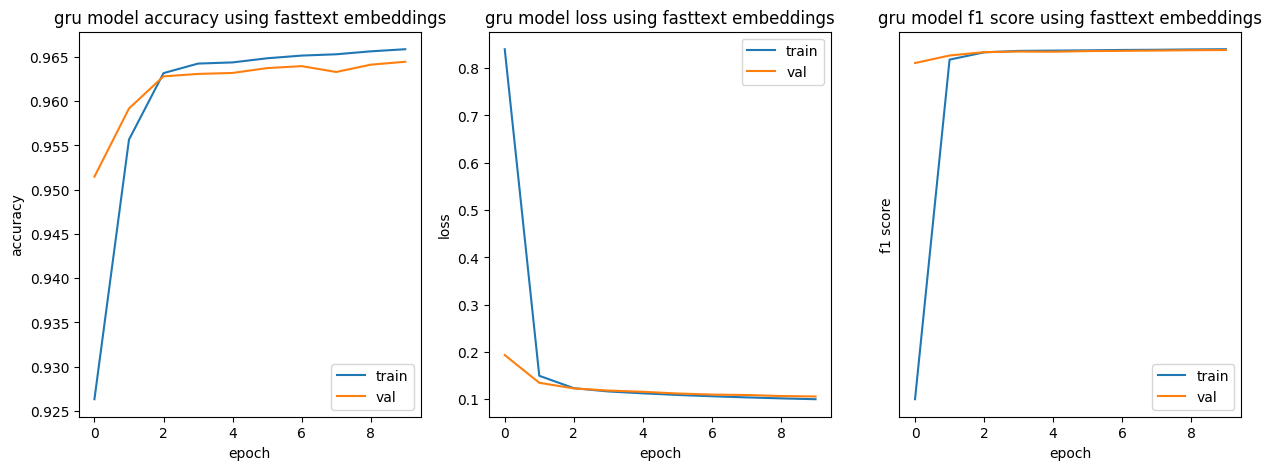

INFO:tensorflow:Assets written to: t2_model3_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t2_model3_fasttext.pkl\assets


#8
Epoch 1/20
29/29 [==============================] - 13s 311ms/step - loss: 0.6368 - accuracy: 0.9176 - precision_7: 0.9325 - recall_7: 0.5679 - val_loss: 0.1737 - val_accuracy: 0.9524 - val_precision_7: 0.9539 - val_recall_7: 0.9511
Epoch 2/20
29/29 [==============================] - 8s 278ms/step - loss: 0.1450 - accuracy: 0.9568 - precision_7: 0.9584 - recall_7: 0.9547 - val_loss: 0.1361 - val_accuracy: 0.9581 - val_precision_7: 0.9605 - val_recall_7: 0.9553
Epoch 3/20
29/29 [==============================] - 8s 281ms/step - loss: 0.1238 - accuracy: 0.9619 - precision_7: 0.9646 - recall_7: 0.9591 - val_loss: 0.1254 - val_accuracy: 0.9610 - val_precision_7: 0.9631 - val_recall_7: 0.9580
Epoch 4/20
29/29 [==============================] - 8s 264ms/step - loss: 0.1165 - accuracy: 0.9632 - precision_7: 0.9655 - recall_7: 0.9604 - val_loss: 0.1165 - val_accuracy: 0.9626 - val_precision_7: 0.9645 - val_recall_7: 0.9603
Epoch 5/20
29/29 [==============================] - 8s 277ms/step - 

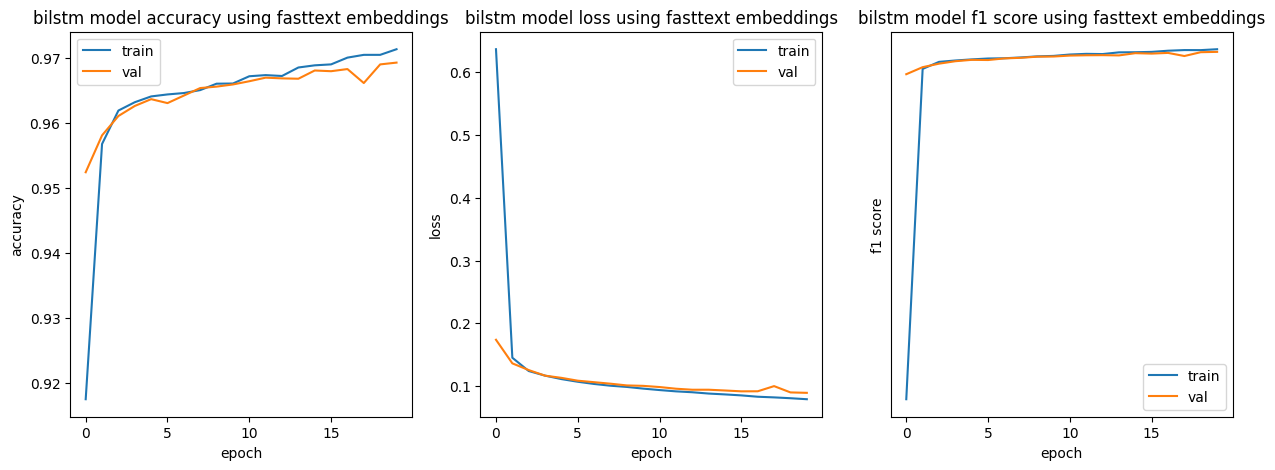

INFO:tensorflow:Assets written to: t2_model4_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t2_model4_fasttext.pkl\assets


#9
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 83, 300)           1023000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 83, 100)           40100     
                                                                 
 time_distributed_8 (TimeDi  (None, 83, 4)             404       
 stributed)                                                      
                                                                 
Total params: 1063504 (4.06 MB)
Trainable params: 40504 (158.22 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 4s 85ms/step - loss: 0.3720 - accuracy: 0.8839 - precision_8: 0.9511 - recall_8: 0.7956 - val_loss: 0.1288 - val_accuracy: 0.9635 - val_precision_8: 0.9641

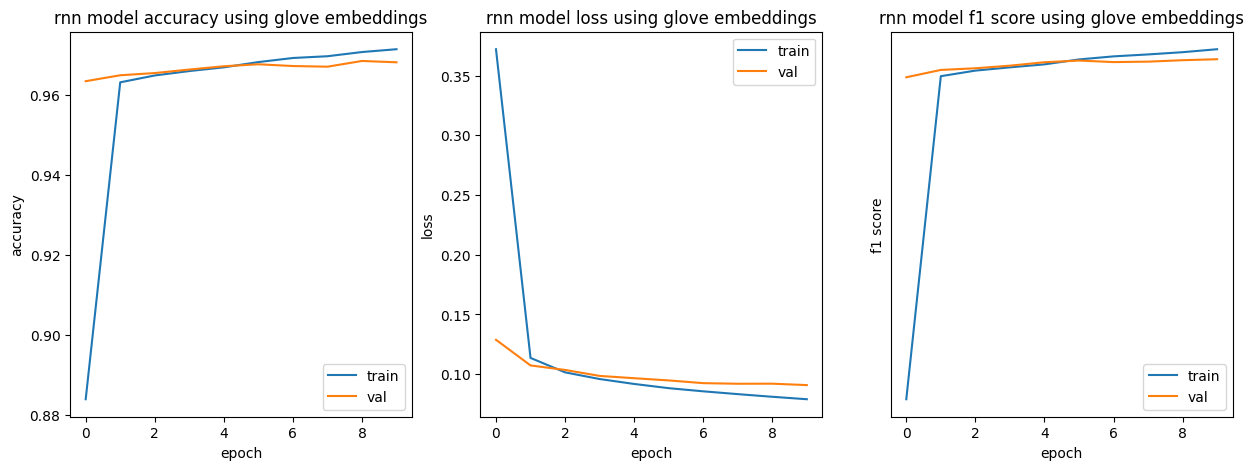

INFO:tensorflow:Assets written to: t2_model1_glove.pkl\assets


INFO:tensorflow:Assets written to: t2_model1_glove.pkl\assets


#10
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 83, 300)           1023000   
                                                                 
 lstm_4 (LSTM)               (None, 83, 100)           160400    
                                                                 
 time_distributed_9 (TimeDi  (None, 83, 4)             404       
 stributed)                                                      
                                                                 
Total params: 1183804 (4.52 MB)
Trainable params: 160804 (628.14 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 5s 125ms/step - loss: 0.5788 - accuracy: 0.9159 - precision_9: 0.9528 - recall_9: 0.6130 - val_loss: 0.1289 - val_accuracy: 0.9631 - val_precision_9: 0.9

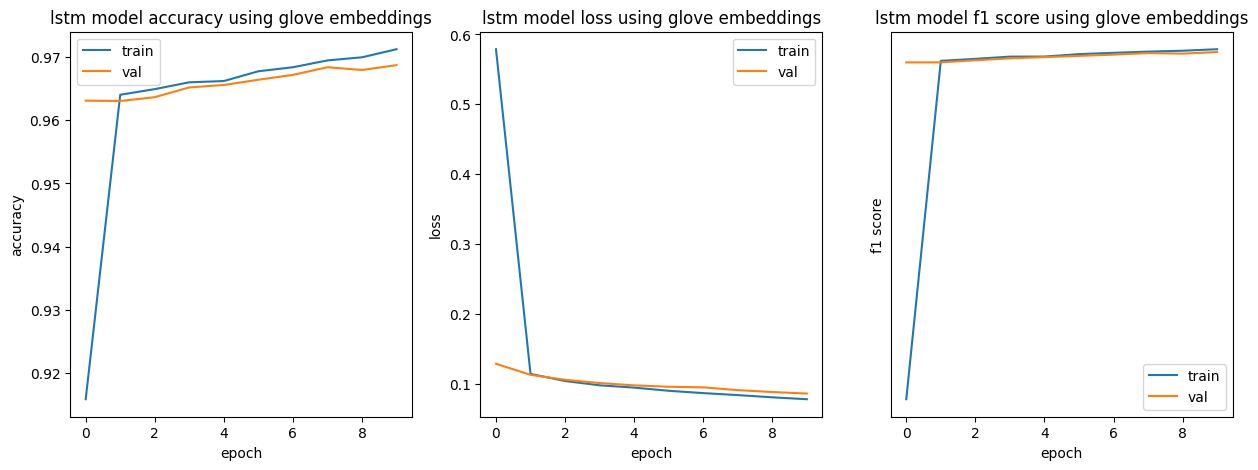

INFO:tensorflow:Assets written to: t2_model2_glove.pkl\assets


INFO:tensorflow:Assets written to: t2_model2_glove.pkl\assets


#11
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 83, 300)           1023000   
                                                                 
 gru_2 (GRU)                 (None, 83, 100)           120600    
                                                                 
 time_distributed_10 (TimeD  (None, 83, 4)             404       
 istributed)                                                     
                                                                 
Total params: 1144004 (4.36 MB)
Trainable params: 121004 (472.67 KB)
Non-trainable params: 1023000 (3.90 MB)
_________________________________________________________________
Epoch 1/10
29/29 [==============================] - 6s 125ms/step - loss: 0.7834 - accuracy: 0.9253 - precision_10: 0.9366 - recall_10: 0.4229 - val_loss: 0.1561 - val_accuracy: 0.9602 - val_precision_10:

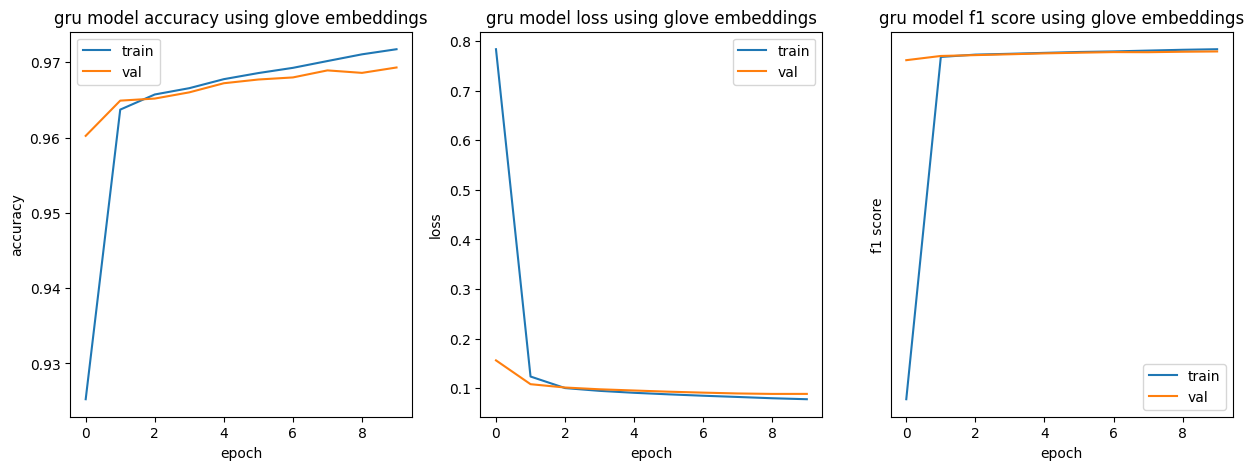

INFO:tensorflow:Assets written to: t2_model3_glove.pkl\assets


INFO:tensorflow:Assets written to: t2_model3_glove.pkl\assets


#12
Epoch 1/20
29/29 [==============================] - 9s 220ms/step - loss: 0.5154 - accuracy: 0.9222 - precision_11: 0.9438 - recall_11: 0.6737 - val_loss: 0.1317 - val_accuracy: 0.9565 - val_precision_11: 0.9570 - val_recall_11: 0.9561
Epoch 2/20
29/29 [==============================] - 5s 186ms/step - loss: 0.1157 - accuracy: 0.9622 - precision_11: 0.9644 - recall_11: 0.9598 - val_loss: 0.1105 - val_accuracy: 0.9647 - val_precision_11: 0.9673 - val_recall_11: 0.9616
Epoch 3/20
29/29 [==============================] - 5s 187ms/step - loss: 0.1027 - accuracy: 0.9655 - precision_11: 0.9687 - recall_11: 0.9623 - val_loss: 0.1051 - val_accuracy: 0.9658 - val_precision_11: 0.9694 - val_recall_11: 0.9629
Epoch 4/20
29/29 [==============================] - 5s 187ms/step - loss: 0.0970 - accuracy: 0.9668 - precision_11: 0.9711 - recall_11: 0.9632 - val_loss: 0.1012 - val_accuracy: 0.9651 - val_precision_11: 0.9685 - val_recall_11: 0.9621
Epoch 5/20
29/29 [==============================] - 

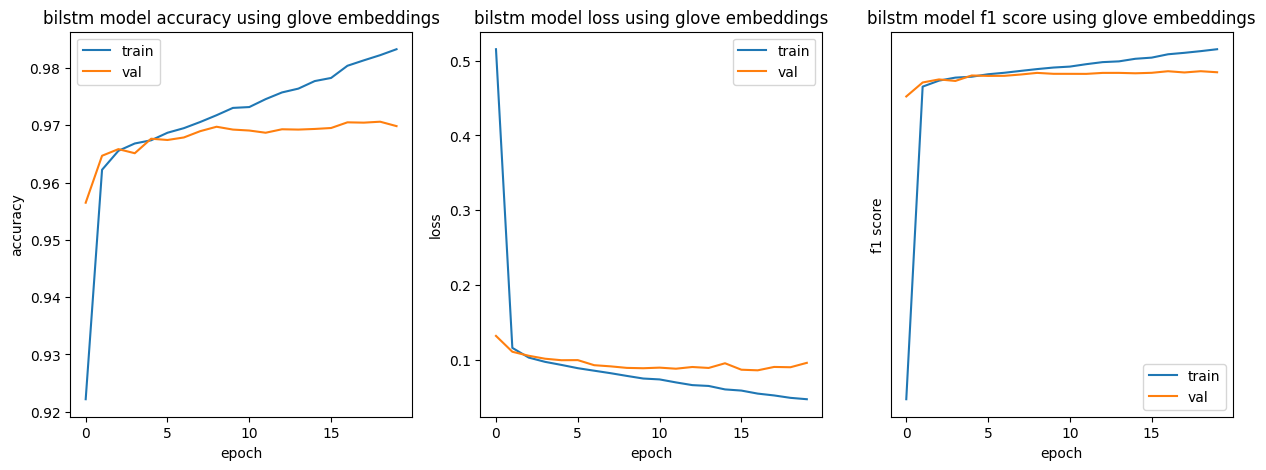

INFO:tensorflow:Assets written to: t2_model4_glove.pkl\assets


INFO:tensorflow:Assets written to: t2_model4_glove.pkl\assets


In [242]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


clear_session()




def build_model(str, num_classes, embedding_matrix):

    global max_length

    if str == 'bilstm':
        model  = Sequential()
        model.add(
            Embedding(
                input_dim=embedding_matrix.shape[0], 
                output_dim=embedding_matrix.shape[1], 
                input_length=max_length, 
                weights=[embedding_matrix], 
                trainable=False))
        model.add(Bidirectional(LSTM(100, return_sequences=True)))
        model.add(TimeDistributed(Dense(num_classes, activation='softmax')))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy' ,
                      metrics=['accuracy' , Precision() , Recall()]
                      )
        return model
        
    else: 
        model = Sequential()
        model.add(
            Embedding(
                input_dim=embedding_matrix.shape[0], 
                output_dim=embedding_matrix.shape[1], 
                input_length=max_length, 
                weights=[embedding_matrix], 
                trainable=False
                )
            )
        
        if str == 'rnn':
            model.add(SimpleRNN(100, return_sequences=True))
        elif str == 'lstm':
            model.add(LSTM(100, return_sequences=True))
        elif str == 'gru':
            model.add(GRU(100, return_sequences=True))
        
        model.add(
            TimeDistributed(
                Dense(
                    num_classes, 
                    activation='softmax'
                    )
                )
            )
        
        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy' , 
                      metrics=['accuracy' , Precision() , Recall()]
                      )
        model.summary()
        return model

max_length = max_sentence_length

embeddings = {
    'word2vec': embedding_matrix_w2v,
    'fasttext': embedding_matrix_fasttext,
    'glove': embedding_matrix_glove
}

num = 1
i_graph = 0 

for embedding_name, embedding_matrix in embeddings.items():
    for model_type in ['rnn', 'lstm', 'gru' , 'bilstm']:
        print(f'#{num}')
        num+=1
        model = build_model(model_type, len(labels), embedding_matrix)
        if model_type == 'bilstm':
            p = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32)
        else:
            p = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)
        y_pred_val = model.predict(x_val).argmax(axis=-1)
        y_true_val = y_val.argmax(axis=-1)

        y_true_train = y_train.argmax(axis=-1)
        y_pred_train = model.predict(x_train).argmax(axis=-1)

        plot_graph(p , embedding_name , model_type , i_graph)

  
        i_graph +=1

        if model_type == 'rnn':
            model.save(f"t2_model1_{embedding_name}.pkl")
        elif model_type == 'lstm':
            model.save(f"t2_model2_{embedding_name}.pkl")
        elif model_type == 'gru':
            model.save(f"t2_model3_{embedding_name}.pkl")
        else:
            model.save(f"t2_model4_{embedding_name}.pkl")

In [245]:
task2_models_dict = {
    "RNN , Word2Vec" : "t2_model1_word2vec.pkl" , "RNN , GloVe" : "t2_model1_glove.pkl" , "RNN , FastText" : "t2_model1_fasttext.pkl" ,
    "LSTM , Word2Vec" : "t2_model2_word2vec.pkl" , "LSTM , GloVe" : "t2_model2_glove.pkl" , "LSTM , FastText" : "t2_model2_fasttext.pkl" ,
    "GRU , Word2Vec" : "t2_model3_word2vec.pkl" , "GRU , GloVe" : "t2_model3_glove.pkl" , "GRU , FastText" : "t2_model3_fasttext.pkl" , 
    "BiLSTM , Word2Vec" : "t2_model4_word2vec.pkl" , "BiLSTM , GloVe" : "t2_model4_glove.pkl" , "BiLSTM , FastText" : "t2_model4_fasttext.pkl"
}

In [246]:
from keras.models import load_model

results = []

for model_type , model_name in task2_models_dict.items():
    model = load_model(model_name)
    accuracy = model.evaluate(x_test , y_test)
    y_pred_test = model.predict(x_test).argmax(axis=-1)
    y_true_test = y_test.argmax(axis=-1)
    f1_test = f1_score(y_true_test.flatten(), y_pred_test.flatten(), average='macro')
    results.append(f"{model_type} - Test accuracy: {accuracy[1]} - Macro F1: {f1_test}")

11/11 [==============================] - 1s 65ms/step


In [247]:
print("RESULTS FOR TASK-2")

for result in results:
    print(result)

RESULTS FOR TASK-2
RNN , Word2Vec - Test accuracy: 0.9655818343162537 - Macro F1: 0.6850093399061189
RNN , GloVe - Test accuracy: 0.9670143723487854 - Macro F1: 0.7329829577304127
RNN , FastText - Test accuracy: 0.9655818343162537 - Macro F1: 0.6549143332712156
LSTM , Word2Vec - Test accuracy: 0.9648104906082153 - Macro F1: 0.643698920050038
LSTM , GloVe - Test accuracy: 0.9673817157745361 - Macro F1: 0.7018021313370433
LSTM , FastText - Test accuracy: 0.9643696546554565 - Macro F1: 0.6305542724022618
GRU , Word2Vec - Test accuracy: 0.9655084013938904 - Macro F1: 0.6738732150781567
GRU , GloVe - Test accuracy: 0.9683000445365906 - Macro F1: 0.7031082598559598
GRU , FastText - Test accuracy: 0.9644798636436462 - Macro F1: 0.6539074956500986
BiLSTM , Word2Vec - Test accuracy: 0.9673817157745361 - Macro F1: 0.7124432257976269
BiLSTM , GloVe - Test accuracy: 0.9691815972328186 - Macro F1: 0.7317567211659775
BiLSTM , FastText - Test accuracy: 0.9681898355484009 - Macro F1: 0.698630955810230

REMANINING DELIVERABLES

In [248]:
labels

['B', 'I', 'O', 'UNKNNOWN']

11/11 [==============================] - 1s 61ms/step


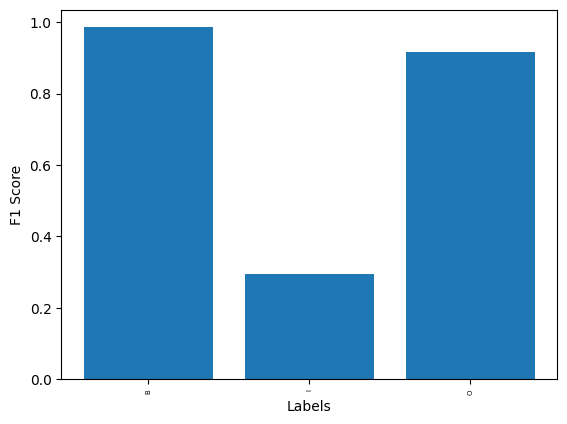

In [250]:
'''

Calculate the label-wise F1 scores (for 13 labels) on test data of Dataset_1 using the
best-performing model. Plot a bar graph or pie chart for this using code. (2 marks)

'''


model = load_model("t2_model4_glove.pkl")
y_pred_test = model.predict(x_test).argmax(axis=-1)
y_true_test = y_test.argmax(axis=-1)


f1_scores = f1_score(y_true_test.flatten(), y_pred_test.flatten(), average=None)


labels_ = labels[:-1]

plt.bar(labels_ , f1_scores )
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.xticks(rotation=90  , fontsize=5)
plt.show()

In [ ]:
# BiLSTM CRF

In [260]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, TimeDistributed, Dense
from tensorflow.keras.models import Model
from tf2crf import CRF, ModelWithCRFLoss


y_train_sparse = np.argmax(y_train, axis=-1)
y_val_sparse = np.argmax(y_val, axis=-1)
input_layer = Input(shape=(max_sentence_length,))
model = Embedding(vocab_size, embedding_dimension, input_length=max_sentence_length, weights=[embedding_matrix_w2v])(input_layer)
model = Bidirectional(LSTM(100, return_sequences=True))(model)
model = TimeDistributed(Dense(len(labels), activation='relu'))(model)
crf = CRF(len(labels))
out = crf(model)
base_model = Model(input_layer, out)
model = ModelWithCRFLoss(base_model)
model.compile(optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_sparse, validation_data=(x_val, y_val_sparse), epochs=10, batch_size=32)
y_test_sparse = np.argmax(y_test, axis=-1)
y_test_pred = model.predict(x_test)
accuracy = np.mean([np.array_equal(y_test_pred[i], y_test_sparse[i]) for i in range(len(y_test_sparse))])
f1 = f1_score(y_test_sparse.flatten(), y_test_pred.flatten(), average='macro')
print(f"BiLSTM Word2VEc - Test accuracy: {accuracy} - Macro F1: {f1}")



Epoch 1/10
29/29 [==============================] - 24s 478ms/step - loss: 64.5385 - accuracy: 0.6703 - val_loss_val: 25.1865 - val_val_accuracy: 0.9226
Epoch 2/10
29/29 [==============================] - 9s 320ms/step - loss: 18.3941 - accuracy: 0.9468 - val_loss_val: 14.7397 - val_val_accuracy: 0.9544
Epoch 3/10
29/29 [==============================] - 11s 368ms/step - loss: 13.5905 - accuracy: 0.9565 - val_loss_val: 12.6357 - val_val_accuracy: 0.9630
Epoch 4/10
29/29 [==============================] - 11s 375ms/step - loss: 11.5196 - accuracy: 0.9652 - val_loss_val: 11.1185 - val_val_accuracy: 0.9658
Epoch 5/10
29/29 [==============================] - 10s 330ms/step - loss: 9.4567 - accuracy: 0.9677 - val_loss_val: 10.1116 - val_val_accuracy: 0.9663
Epoch 6/10
29/29 [==============================] - 10s 361ms/step - loss: 8.3636 - accuracy: 0.9682 - val_loss_val: 9.6625 - val_val_accuracy: 0.9659
Epoch 7/10
29/29 [==============================] - 12s 425ms/step - loss: 7.6337 - ac

INFO:tensorflow:Assets written to: t2_model5_word2vec.pkl\assets


INFO:tensorflow:Assets written to: t2_model5_word2vec.pkl\assets


In [261]:
y_train_sparse = np.argmax(y_train, axis=-1)
y_val_sparse = np.argmax(y_val, axis=-1)
input_layer = Input(shape=(max_sentence_length,))
model = Embedding(vocab_size, embedding_dimension, input_length=max_sentence_length, weights=[embedding_matrix_glove])(input_layer)
model = Bidirectional(LSTM(100, return_sequences=True))(model)
model = TimeDistributed(Dense(len(labels), activation='relu'))(model)
crf = CRF(len(labels))
out = crf(model)
base_model = Model(input_layer, out)
model = ModelWithCRFLoss(base_model)
model.compile(optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_sparse, validation_data=(x_val, y_val_sparse), epochs=10, batch_size=32)
y_test_sparse = np.argmax(y_test, axis=-1)
y_test_pred = model.predict(x_test)
accuracy = np.mean([np.array_equal(y_test_pred[i], y_test_sparse[i]) for i in range(len(y_test_sparse))])
f1 = f1_score(y_test_sparse.flatten(), y_test_pred.flatten(), average='macro')
print(f"BiLSTM Glove - Test accuracy: {accuracy} - Macro F1: {f1}")



Epoch 1/10
29/29 [==============================] - 24s 392ms/step - loss: 40.0179 - accuracy: 0.7044 - val_loss_val: 24.9911 - val_val_accuracy: 0.7798
Epoch 2/10
29/29 [==============================] - 10s 331ms/step - loss: 23.8936 - accuracy: 0.7801 - val_loss_val: 23.8615 - val_val_accuracy: 0.7826
Epoch 3/10
29/29 [==============================] - 9s 327ms/step - loss: 22.7200 - accuracy: 0.7850 - val_loss_val: 22.2668 - val_val_accuracy: 0.7867
Epoch 4/10
29/29 [==============================] - 9s 314ms/step - loss: 20.9205 - accuracy: 0.7863 - val_loss_val: 20.8360 - val_val_accuracy: 0.7866
Epoch 5/10
29/29 [==============================] - 10s 350ms/step - loss: 19.3278 - accuracy: 0.7864 - val_loss_val: 19.4168 - val_val_accuracy: 0.7866
Epoch 6/10
29/29 [==============================] - 10s 358ms/step - loss: 17.5109 - accuracy: 0.7866 - val_loss_val: 17.9211 - val_val_accuracy: 0.7866
Epoch 7/10
29/29 [==============================] - 11s 363ms/step - loss: 15.5468 -

INFO:tensorflow:Assets written to: t2_model5_glove.pkl\assets


INFO:tensorflow:Assets written to: t2_model5_glove.pkl\assets


In [262]:
y_train_sparse = np.argmax(y_train, axis=-1)
y_val_sparse = np.argmax(y_val, axis=-1)
input_layer = Input(shape=(max_sentence_length,))
model = Embedding(vocab_size, embedding_dimension, input_length=max_sentence_length, weights=[embedding_matrix_fasttext])(input_layer)
model = Bidirectional(LSTM(100, return_sequences=True))(model)
model = TimeDistributed(Dense(len(labels), activation='relu'))(model)
crf = CRF(len(labels))
out = crf(model)
base_model = Model(input_layer, out)
model = ModelWithCRFLoss(base_model)
model.compile(optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_sparse, validation_data=(x_val, y_val_sparse), epochs=10, batch_size=32)
y_test_sparse = np.argmax(y_test, axis=-1)
y_test_pred = model.predict(x_test)
accuracy = np.mean([np.array_equal(y_test_pred[i], y_test_sparse[i]) for i in range(len(y_test_sparse))])
f1 = f1_score(y_test_sparse.flatten(), y_test_pred.flatten(), average='macro')
print(f"BiLSTM Fasttext - Test accuracy: {accuracy} - Macro F1: {f1}")



Epoch 1/10
29/29 [==============================] - 22s 430ms/step - loss: 35.9949 - accuracy: 0.9084 - val_loss_val: 12.2957 - val_val_accuracy: 0.9629
Epoch 2/10
29/29 [==============================] - 10s 337ms/step - loss: 11.0636 - accuracy: 0.9645 - val_loss_val: 11.0661 - val_val_accuracy: 0.9640
Epoch 3/10
29/29 [==============================] - 7s 245ms/step - loss: 9.6700 - accuracy: 0.9665 - val_loss_val: 12.7609 - val_val_accuracy: 0.9610
Epoch 4/10
29/29 [==============================] - 6s 197ms/step - loss: 9.3629 - accuracy: 0.9650 - val_loss_val: 9.7124 - val_val_accuracy: 0.9642
Epoch 5/10
29/29 [==============================] - 6s 193ms/step - loss: 8.2371 - accuracy: 0.9671 - val_loss_val: 9.2041 - val_val_accuracy: 0.9648
Epoch 6/10
29/29 [==============================] - 9s 324ms/step - loss: 7.3111 - accuracy: 0.9681 - val_loss_val: 8.8698 - val_val_accuracy: 0.9642
Epoch 7/10
29/29 [==============================] - 10s 355ms/step - loss: 6.7070 - accuracy:

INFO:tensorflow:Assets written to: t2_model5_fasttext.pkl\assets


INFO:tensorflow:Assets written to: t2_model5_fasttext.pkl\assets
